# Generalisation to CIELAB space

This notebook plots the distribution of double opponent cells in different layers of our model trained on CIELAB images as a function of bottleneck size. The distribution is nearly identical to that of networks trained on images in RGB space. It corresponds to Figure 3(a) in the paper.

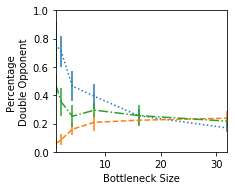

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from statistics import load

plt.figure(figsize=(3,2.5))

spatial = pd.read_pickle('logs/spatial-lab.pd')
spectral = pd.read_pickle('logs/devalois-lab.pd')

LAB_opps = load.double(spectral, spatial)
retina2 = LAB_opps[LAB_opps['layer'] == 'retina_relu2']
ventral0 = LAB_opps[LAB_opps['layer'] == 'ventral_relu0']
ventral1 = LAB_opps[LAB_opps['layer'] == 'ventral_relu1']

plt.errorbar(retina2['n_bn'], retina2['mean_rel_amount'], yerr=retina2['std_rel_amount'], label='Retina2', linestyle=':')
plt.errorbar(ventral0['n_bn'], ventral0['mean_rel_amount'], yerr=ventral0['std_rel_amount'], label='Ventral1', linestyle='--')
plt.errorbar(ventral1['n_bn'], ventral1['mean_rel_amount'], yerr=ventral1['std_rel_amount'], label='Ventral2', linestyle='-.')

plt.tight_layout()

plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage \nDouble Opponent')
plt.xlim(1, 32)
plt.ylim(0, 1)
plt.savefig('figures/double_lab.eps', bbox_inches='tight')